## Hydrophobic Core Distance analyses

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### Map pdb positions to aligned positions from pdb structure

In [2]:
def map_positions(pdb):
    mapPos=list()
    with open("/FILE/md_positionsAll",'r') as file:
        for line in file.readlines():
            line=line.strip()
            cols=line.split('\t')
            if (cols[1].isupper() or cols[1]=='-') and cols[0]==pdb:
                mapPos.append(float(cols[4]))
#                 print(line)
    return (mapPos)

# Map all PDB positions to aligned positions
def map_positions_all(pdb):
    mapPos=list()
    with open("/FILE/GTpdbPos-AlnPos-fam-mech.txt",'r') as file:
        for line in file.readlines():
            line=line.strip()
            cols=line.split('\t')
#             print(cols)
            if (cols[4].isupper() and cols[3]==pdb):
                mapPos.append(float(cols[6]))
                #print(line)
            elif (cols[4]=='-' and cols[3]==pdb):
                mapPos.append(float(-1))
                #print(line)
    return (mapPos)

### Map to Aligned Position

In [4]:
Pos=[1,2,3,13,17,20,32,33,34,86,87,100,156,183]
# Pos=[111]
pdb="6bsv_A"
def get_selectedPositions(Pos,pdb): #Pos,pdb
    maps=map_positions_all(pdb)
    Sel=list()
    for i in Pos:
        j=i-1
        Sel.append(int(maps[j]))
    return(Sel)

# Map selected positions for a single pdb file
SelPos=get_selectedPositions(Pos,pdb)
print(SelPos)

[153, 154, 155, 171, 175, 178, 189, 190, 191, 223, 224, 237, 275, 322]


### Biopython code defining the Minimimum distance between atoms of a residue (excluding hydrogens)

In [5]:
import sys
from Bio.PDB import PDBParser

# create parser
parser = PDBParser()


def biopy_dist(Strname,ch,res1,res2):
    # create parser
    parser = PDBParser()
    # read structure from file
    structure = parser.get_structure('Str1', Strname)

    model = structure[0]
    chain = model[ch]
    
        ## ATOMS:
    # N CA C O CB Everything except these.. calculate distance
    main_atoms = ['HE1','HE2','HE3','HZ','H','HA','HB2','HB','HB3','HG','HD21','HD22','HD23','HD11','HB1','HD12','HD13','HG11','HG12','HG13','HG21','HG22','HG23','HD2','HD1','HD3']

    resolution = structure.header['resolution']

    for residue1 in chain:
        if residue1.get_id()[1] == res1:
            for residue2 in chain:
                if residue2.get_id()[1] == res2:
                    best_dist=1000
                    final_out=''
                    for atom1 in residue1:
                        if (str(atom1.get_name()) not in main_atoms):
                            for atom2 in residue2:
                                if (str(atom2.get_name()) not in main_atoms):
                                    try:
                                        distance = residue1[atom1.get_name()] - residue2[atom2.get_name()]
                                        out=residue1.get_resname(),residue1.get_id()[1],atom1.get_name(),residue2.get_resname(),residue2.get_id()[1],atom2.get_name(),distance

                                        if float(distance)<float(best_dist):
                                            final_out=out
                                            best_dist=distance

                                    except KeyError:
                                        continue
                    if (len(final_out)>0): #>0
                        return '\t'.join([str(a) for a in final_out])
                    elif (len(final_out)==0):
                        return "0"
                    else:
                        return 'NONE'
                        
    return ''

### Code to write out minimum distance data between positions

In [ ]:
Pos=[1,2,3,13,17,20,32,33,34,86,87,100,156,183]
import warnings
#Selecting only final pos
warnings.filterwarnings('ignore')

w = open("/FILE/pos2.csv", "w")
vs = lambda x: '\t'.join(map(str,x))

with open("/FILE/pdb_list2.txt",'r') as file:
    for line in file.readlines():
        line=line.strip()
        cols=line.split('\t')
        a=cols[2]
        b=a.split('_')
        banjo = "/FILE/pdbs/" + str(b[0]) + ".pdb"
        
        SelPos=get_selectedPositions(Pos,a)
        Pos1 = [SelPos[1], SelPos[1], SelPos[1], SelPos[1], SelPos[1], SelPos[1], SelPos[1], SelPos[1], SelPos[1], SelPos[1], SelPos[1 ], SelPos[1 ], SelPos[1 ], SelPos[1 ]]
        Pos2 = [SelPos[0], SelPos[1], SelPos[2], SelPos[3], SelPos[4], SelPos[5], SelPos[6], SelPos[7], SelPos[8], SelPos[9], SelPos[10], SelPos[11], SelPos[12], SelPos[13]]
        
        for i in range(len(Pos1)): #range(len()
            write_data = vs([cols[0],cols[1],a]) + '\t' + biopy_dist(banjo,b[1],Pos1[i],Pos2[i]) + '\t' + str(Pos[i]) + '\n'
            print(write_data)
            w.write(
            
            write_data
        
            )

w.close()

In [ ]:
### Seaborn Analyses

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
sns.set_theme(style="white")

pos1     = pd.read_csv("/FILE/pos1.csv")
pos2     = pd.read_csv("/FILE/pos2.csv")
pos3     = pd.read_csv("/FILE/pos3.csv")
pos13    = pd.read_csv("/FILE/pos13.csv")
pos17    = pd.read_csv("/FILE/pos17.csv")
pos20    = pd.read_csv("/FILE/pos20.csv")
pos32    = pd.read_csv("/FILE/pos32.csv")
pos33    = pd.read_csv("/FILE/pos33.csv")
pos34    = pd.read_csv("/FILE/pos34.csv")
pos86    = pd.read_csv("/FILE/pos86.csv")
pos87    = pd.read_csv("/FILE/pos87.csv")
pos100   = pd.read_csv("/FILE/pos100.csv")
pos156   = pd.read_csv("/FILE/pos156.csv")
pos183   = pd.read_csv("/FILE/pos183.csv")
volcano  = pd.read_csv("/FILE/volc-156-183.csv")
only_183 = pd.read_csv("/FILE/only_183.csv")

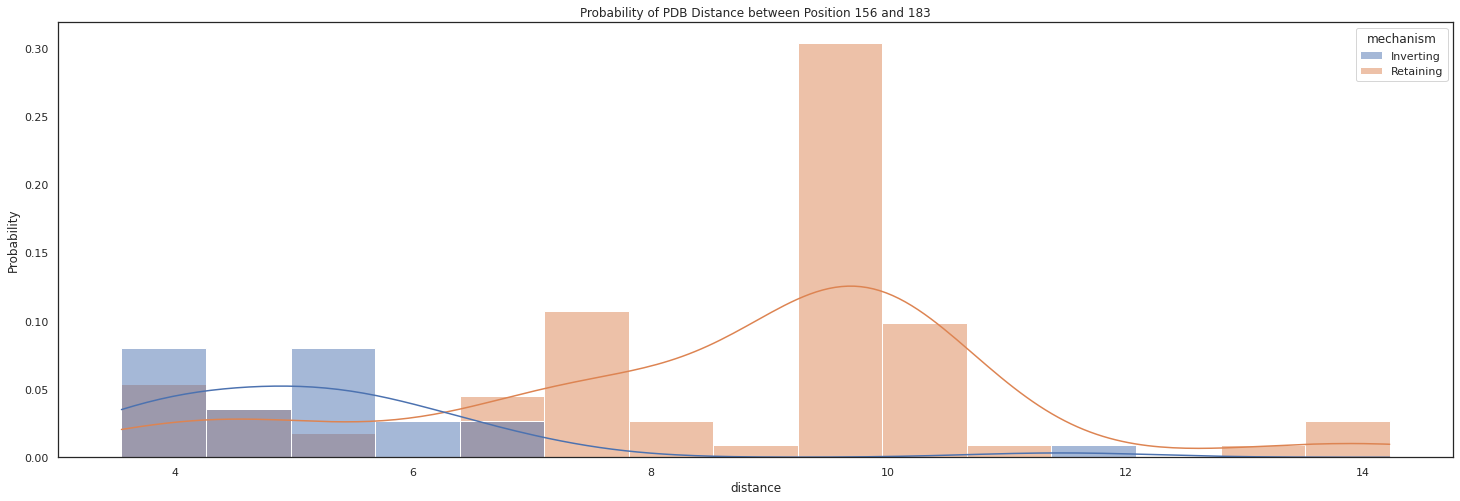

In [186]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
# ax.set_ylim(0, 25)
ax.set_title("Probability of PDB Distance between Position 156 and 183")
sns.histplot(x=volcano['distance'], hue=volcano['mechanism'], kde=True, bins=15, ax=ax, stat='probability')
plt.show()

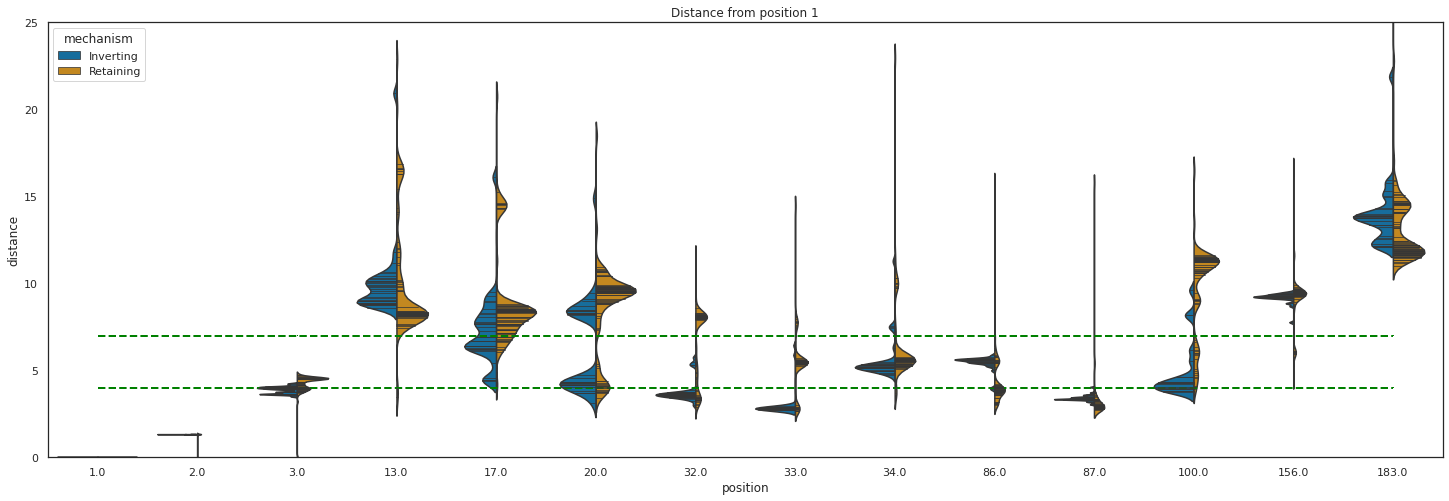

In [340]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 1")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos1["distance"], x=pos1["position"], hue=pos1["mechanism"], inner="stick", split=True, palette="colorblind", bw=.15)

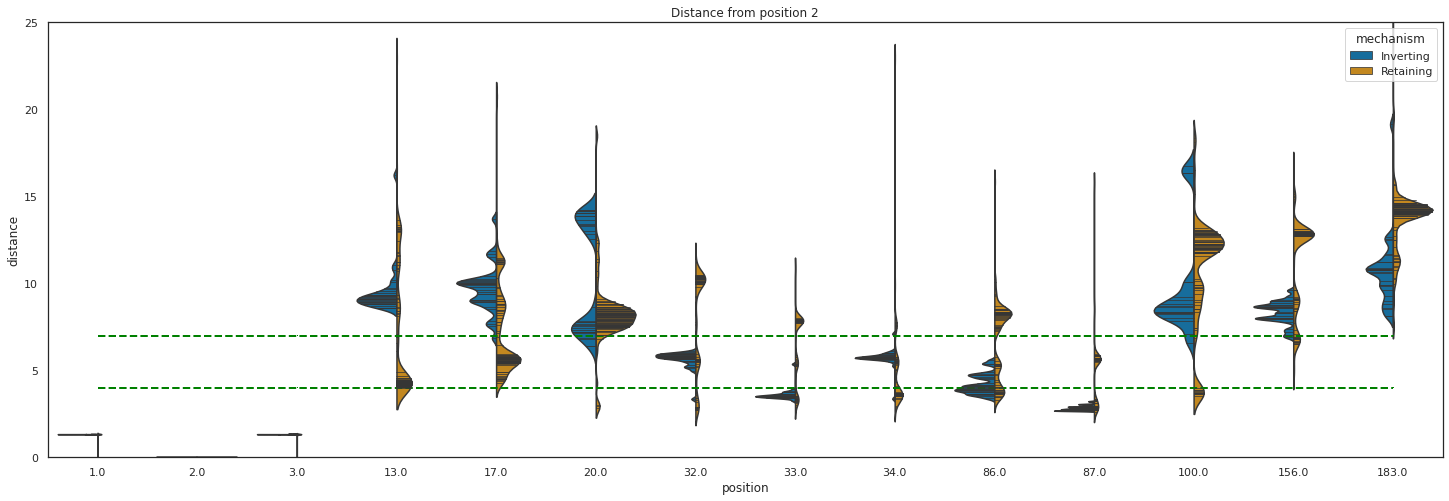

In [339]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 2")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos2["distance"], x=pos2["position"], hue=pos2["mechanism"], inner="stick", split=True, palette="colorblind", bw=.15)

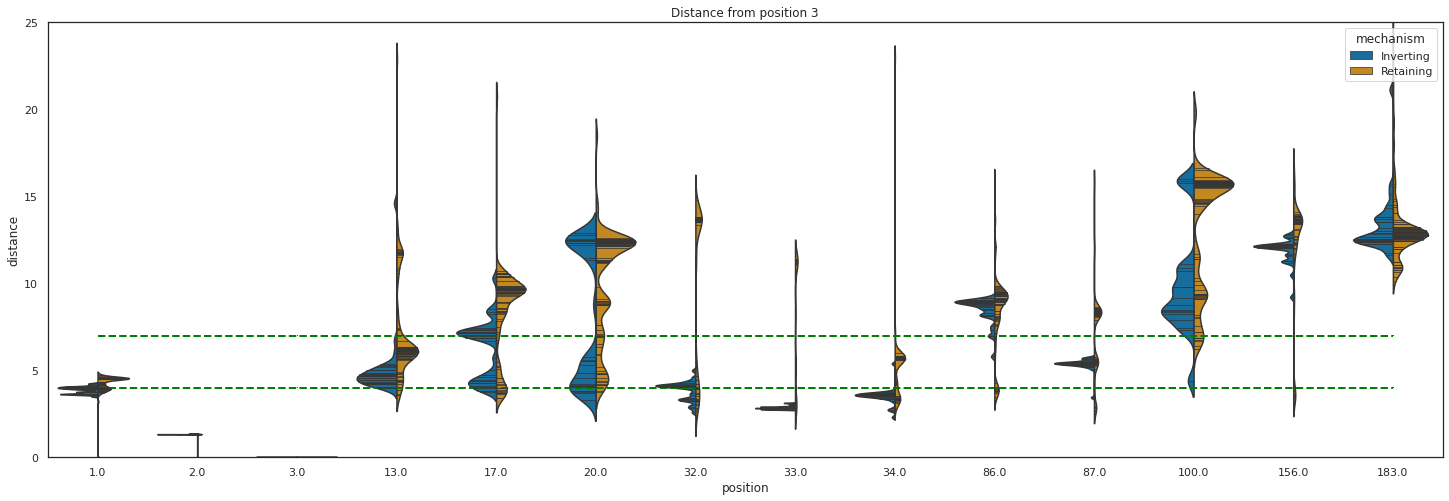

In [338]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 3")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos3["distance"], x=pos3["position"], hue=pos3["mechanism"], inner="stick", split=True, palette="colorblind", bw=.15)

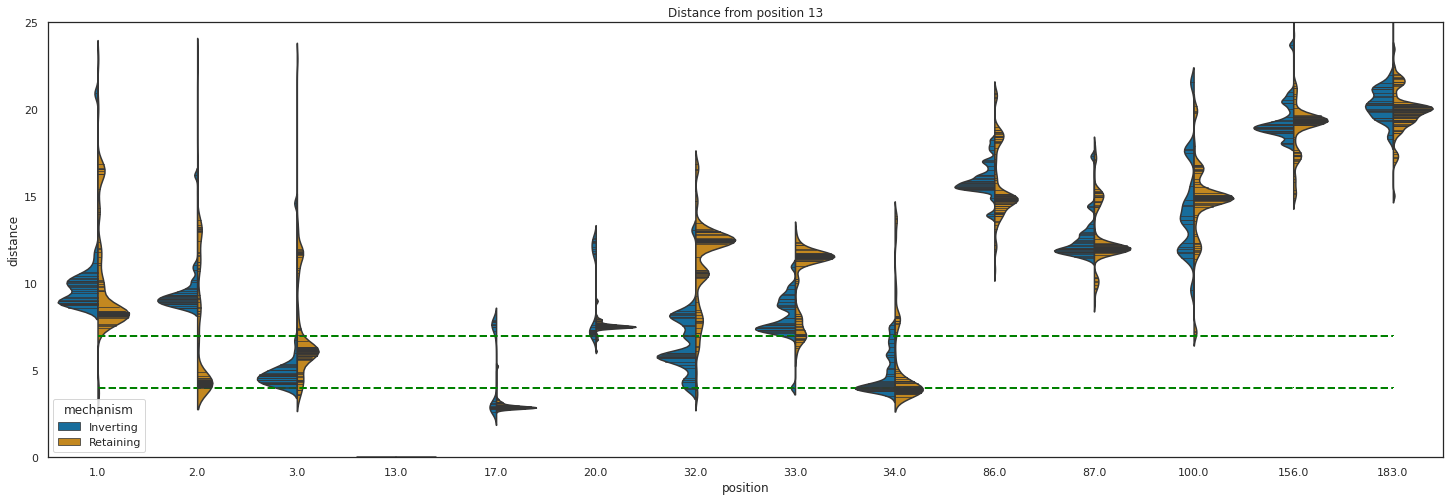

In [337]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 13")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos13["distance"], x=pos13["position"], hue=pos13["mechanism"], inner="stick", split=True, palette="colorblind", bw=.15)

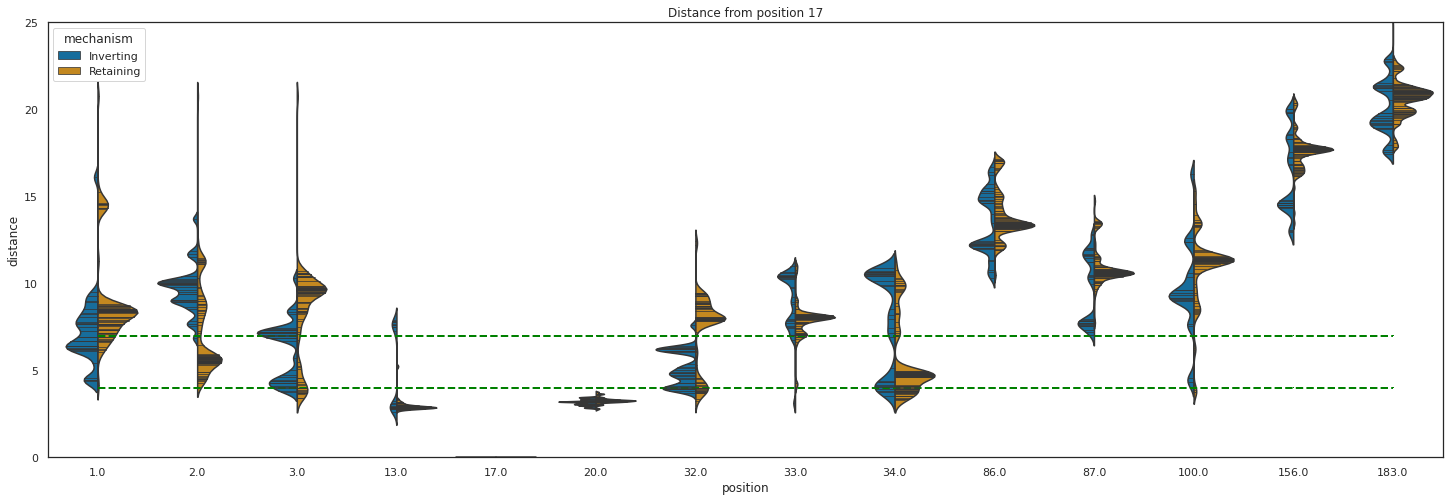

In [336]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 17")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos17["distance"], x=pos17["position"], hue=pos17["mechanism"], inner="stick", split=True, palette="colorblind", bw=.15)

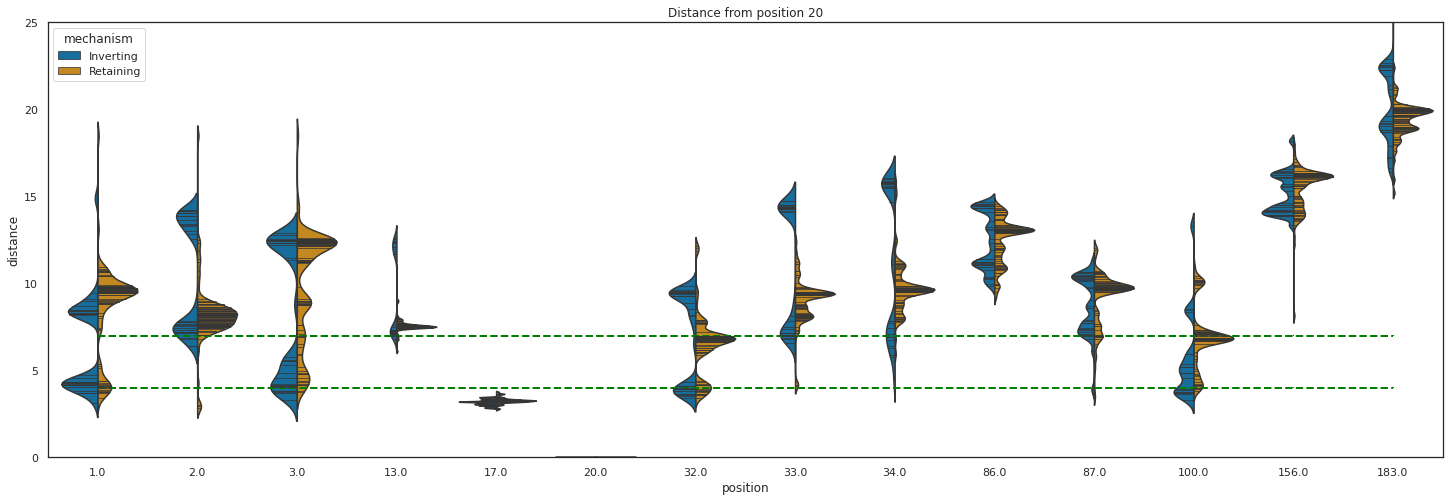

In [335]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 20")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos20["distance"], x=pos20["position"], hue=pos20["mechanism"], inner="stick", split=True, palette="colorblind", bw=.15)

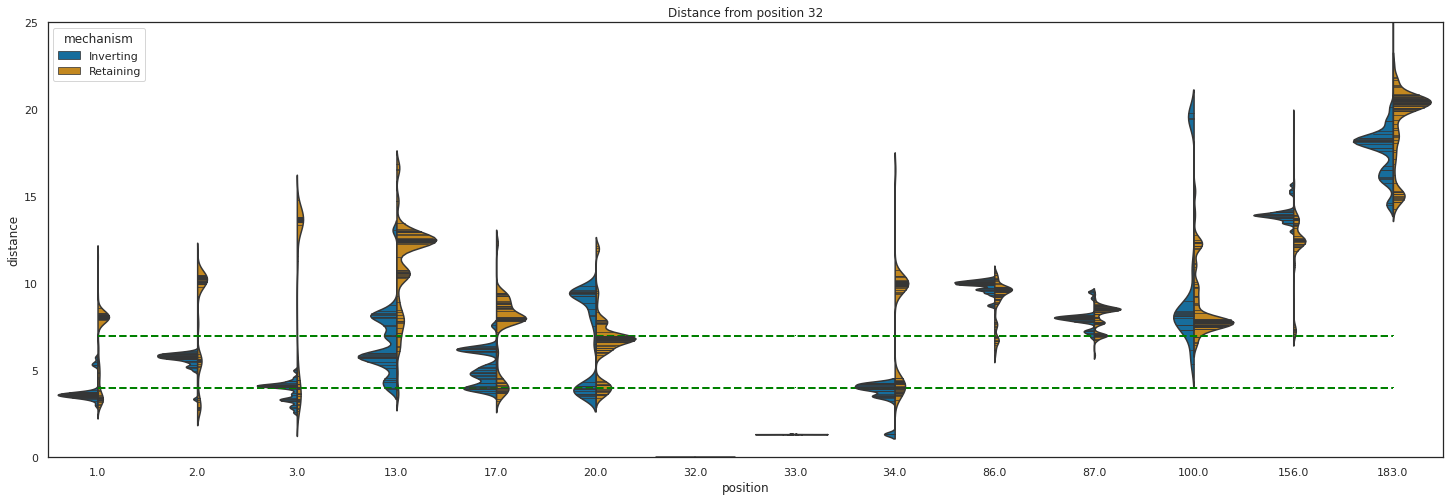

In [354]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 32")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos32["distance"], x=pos32["position"], hue=pos32["mechanism"], inner="stick", split=True, palette="colorblind", bw=.15)

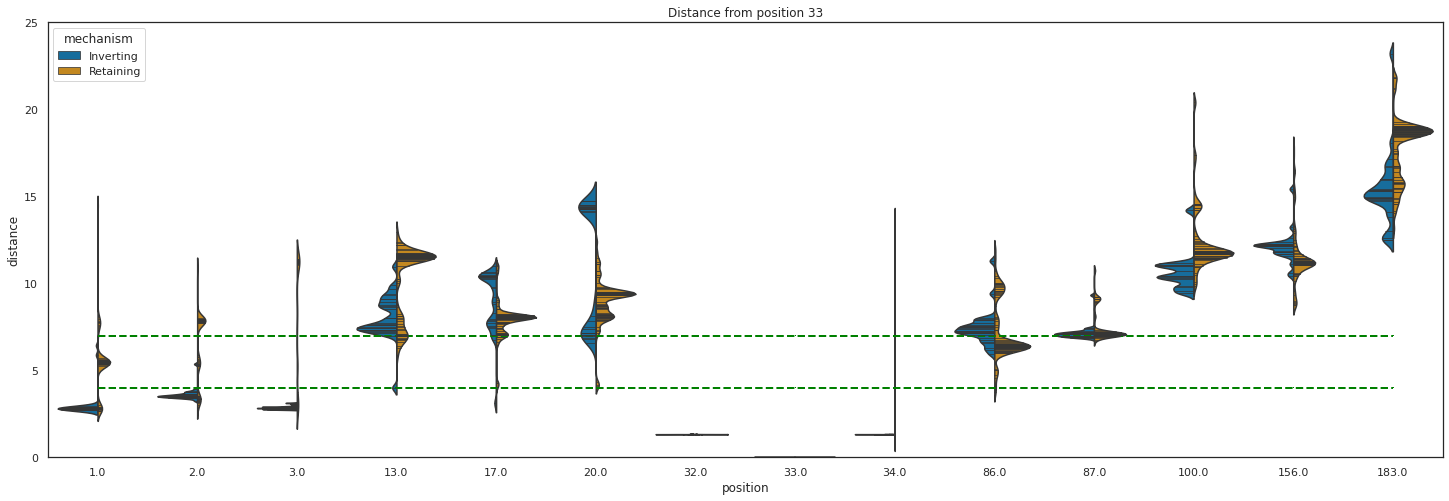

In [356]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 33")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos33["distance"], x=pos33["position"], hue=pos33["mechanism"], inner="stick", split=True, palette="colorblind", bw=.15)

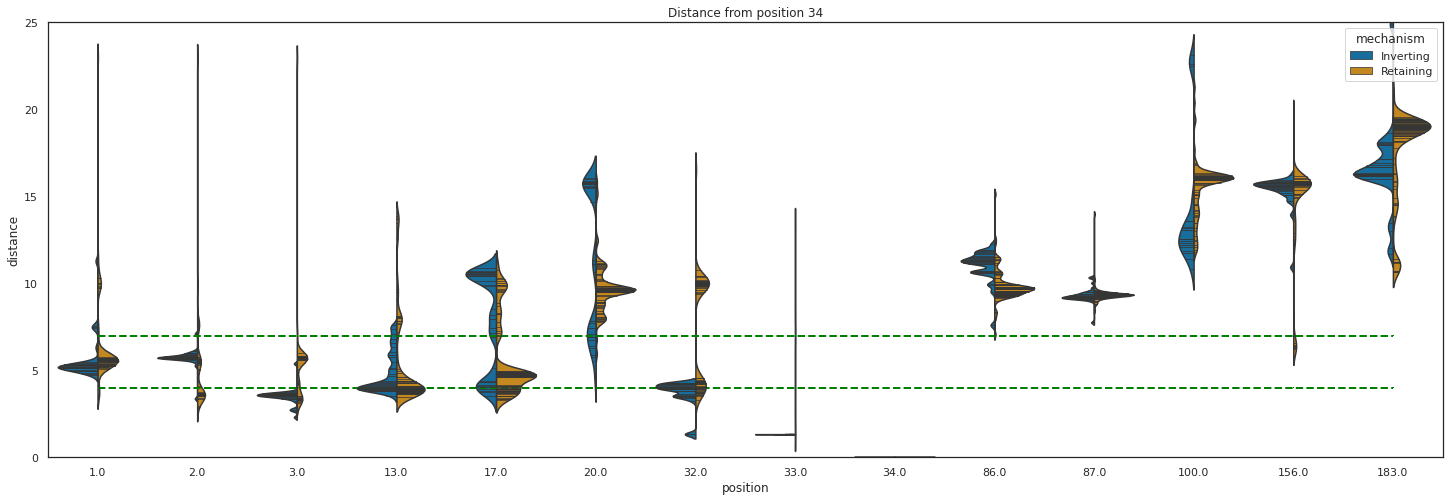

In [357]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 34")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos34["distance"], x=pos34["position"], hue=pos34["mechanism"],  inner="stick", split=True, palette="colorblind", bw=.15)

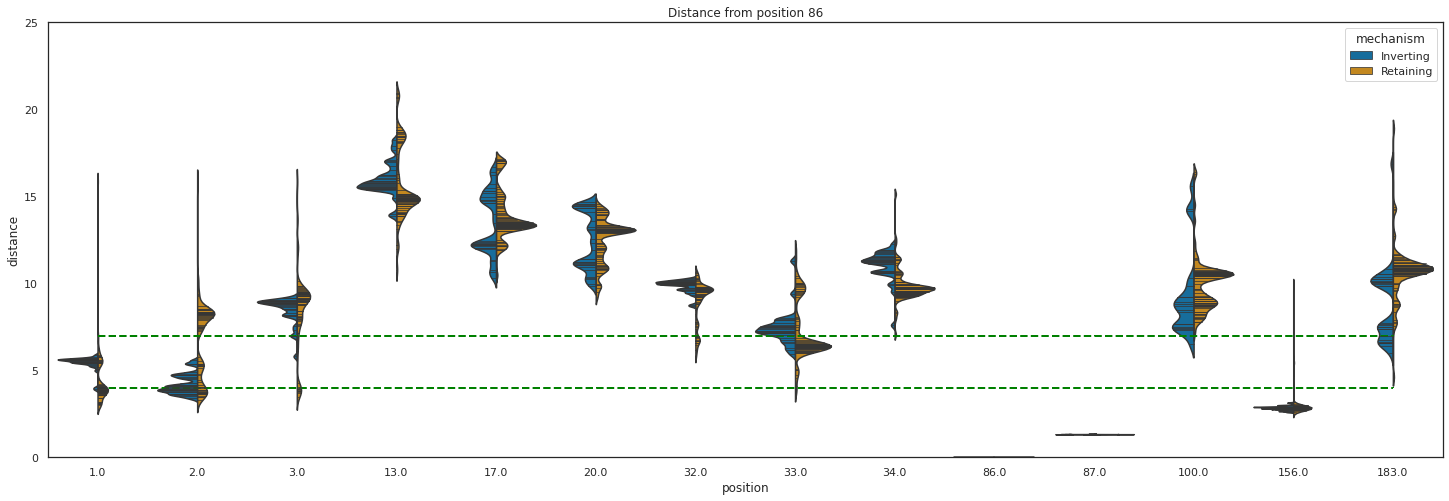

In [331]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 86")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos86["distance"], x=pos86["position"], hue=pos86["mechanism"],  inner="stick", split=True, palette="colorblind", bw=.15)

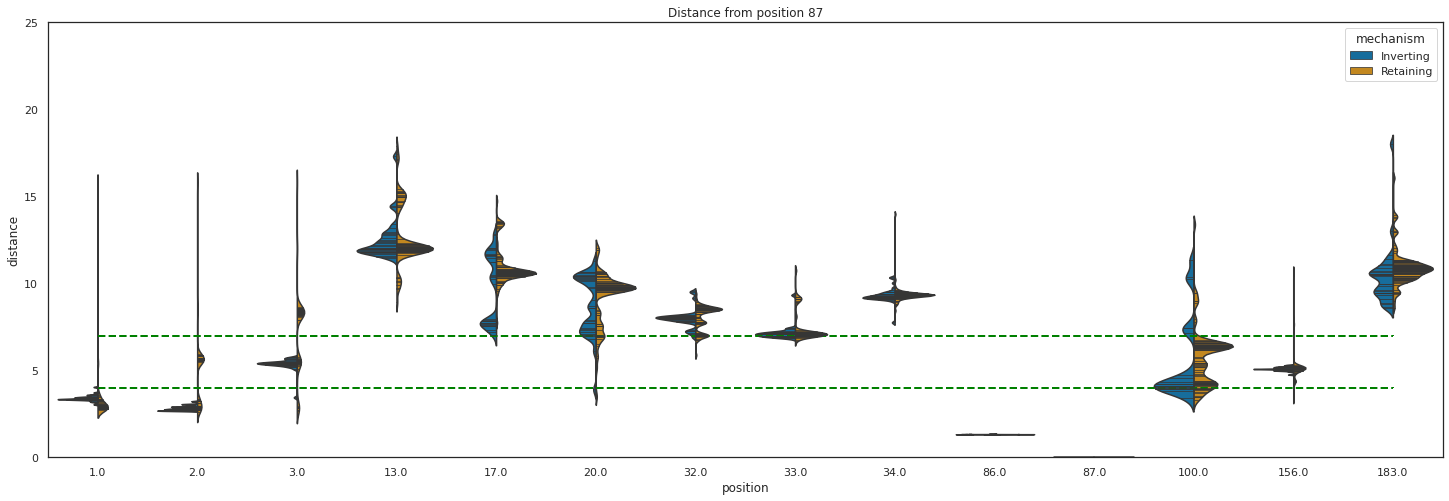

In [330]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 87")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos87["distance"], x=pos87["position"], hue=pos87["mechanism"],  inner="stick", split=True, palette="colorblind", bw=.15)

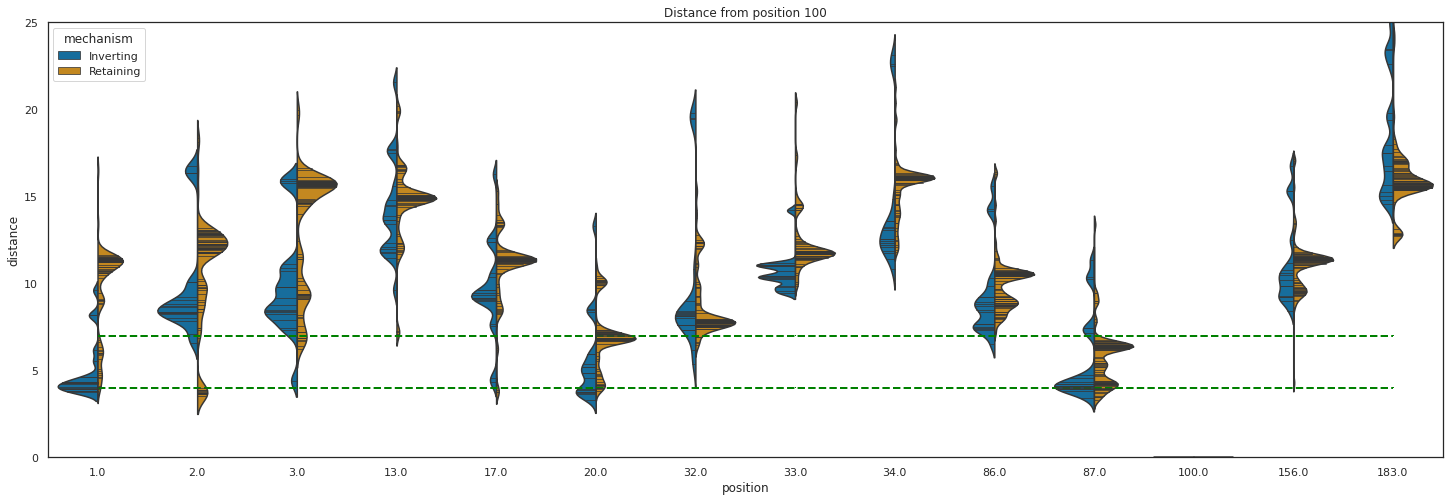

In [329]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 100")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos100["distance"], x=pos100["position"], hue=pos100["mechanism"], inner="stick", split=True, palette="colorblind", bw=.15)

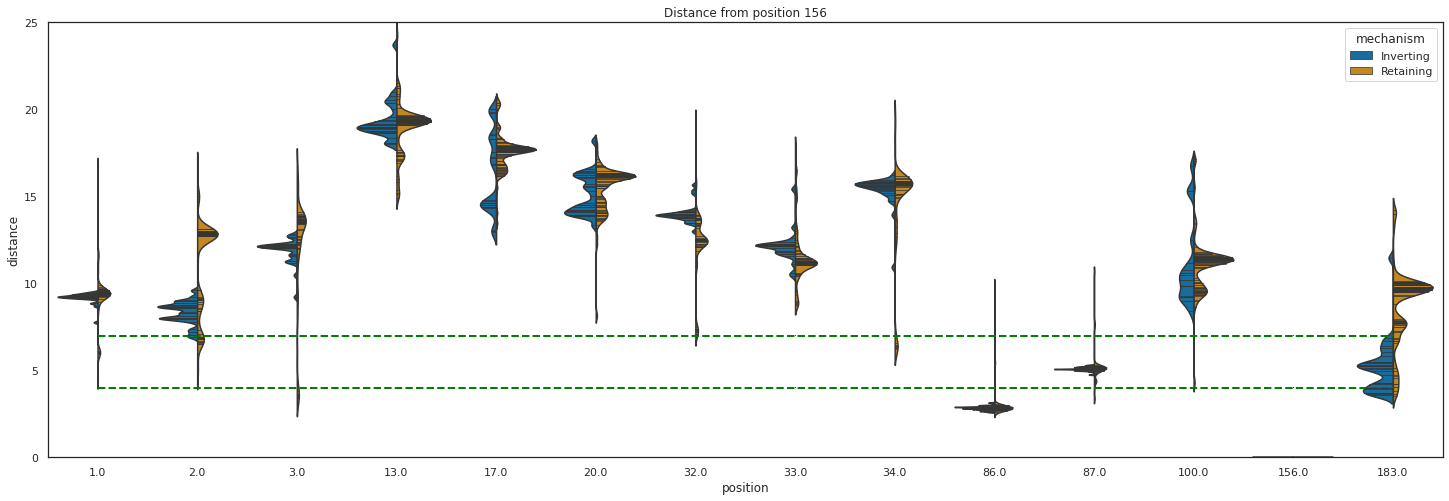

In [328]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 156")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos156["distance"], x=pos156["position"], hue=pos156["mechanism"], inner="stick", split=True, palette="colorblind", bw=.15)

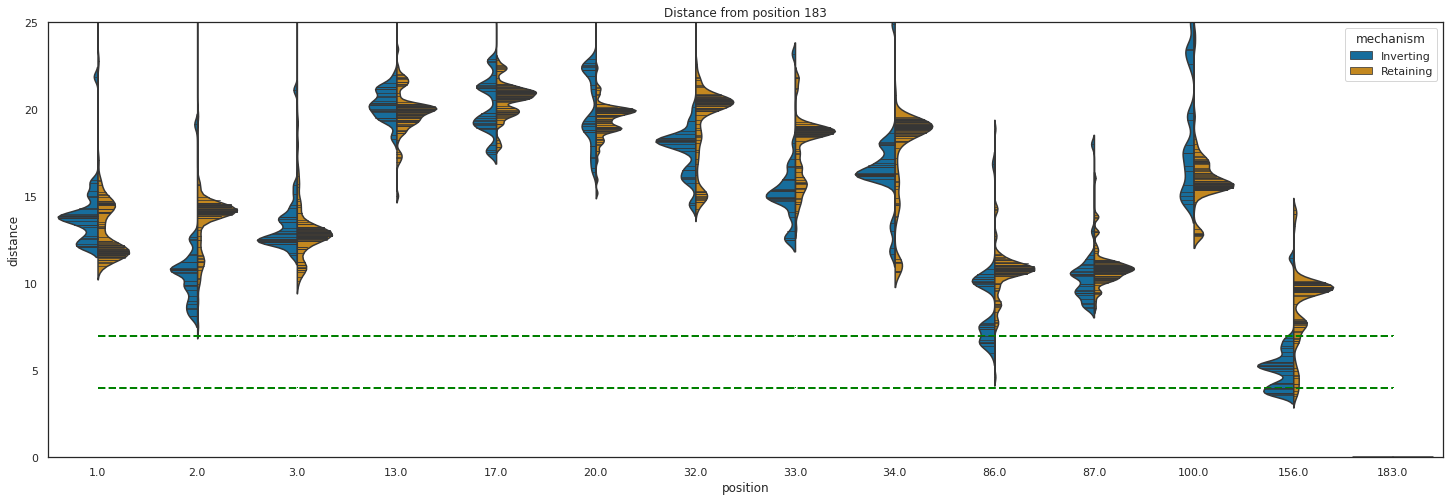

In [327]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 25)
ax.set_title("Distance from position 183")
ax.plot([4,4,4,4,4,4,4,4,4,4,4,4,4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax.plot([7,7,7,7,7,7,7,7,7,7,7,7,7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=pos183["distance"], x=pos183["position"], hue=pos183["mechanism"], inner="stick", split=True, palette="colorblind", bw=.15)

### Code to produce Fig 3A

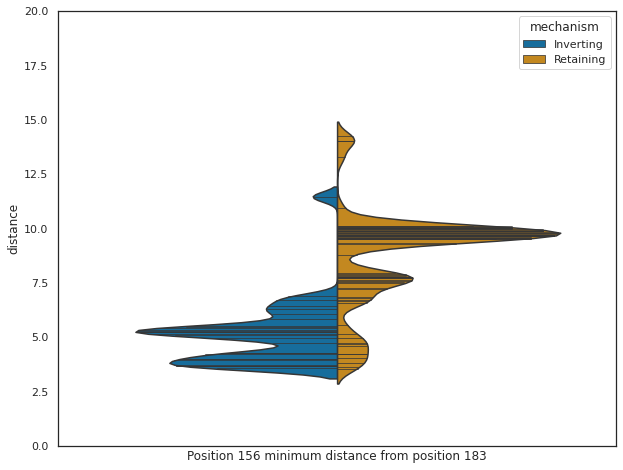

In [23]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_ylim(0, 20)
# ax.plot([4,4], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
# ax.plot([7,7], color='green', marker=',', linestyle='dashed', linewidth=2, markersize=12)
ax = sns.violinplot(y=only_183["distance"], x=only_183["position"], hue=only_183["mechanism"], inner="stick", split=True, palette="colorblind", bw=.15)
ax.set_xticks([])
ax.set_xlabel("Position 156 minimum distance from position 183")

plt.savefig('core_156-183.png', dpi=300)

### Code to map sequence position to AlphaFold structure (or any pdb structure)

In [ ]:
seq      = "LLLAIKSLT-PHF-ARRQAIRESWGQESNAGNQTVVRVFLLGQTP-PED-N--HPDLSDMLKFEsekhqdilmwnyrdtffnlSLKEVLFLRWVST-SCPDTEFVFKGDDDVFVNTHHILNYLNslSKTKaKDLFIGDVIHNAGPHRDKKLKYYIPEVV-YSGLYP---PYAGGgGFLYSGHLALRLY---HITDQvHLYPIDDVYTGMCLQKLGlvPEKH--KGFRTFDieeknknnicsyvdlmLVHSRkPQ-----E-MIDIW-------Sqlqsahlkc"

# Make sure the cfa and pdb start with the same residue -- use the residue number on pdb minus 1 to label the number in pdb
# Make sure to re-insert any deletions in the pdb back into fasta sequence.
# No need to worry about this for alphafold2 since all pdbs start at 1 (so pdb = 0)

pdb      = 143
pos      = 0
pdb_name = "6WMN_A"

for i in seq:
    if i.islower():
        pdb=pdb+1
    elif i.isupper():
        pdb=pdb+1
        pos=pos+1
    elif i == "-":
        pos=pos+1
    print(pdb_name, "\t", i, "\t", pdb, "\t", pos)